In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (<ipython-input-1-d960544c3de0>, line 1)

### <span style='color:green'> **[done]** </span>Loading Features data

In [2]:
loc = '../data/'
file = 'fight_stat_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,train,Aleksandra Albu,Kailin Curran,win,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820,0.147163,0.147163,0.147163,0.147163
6729,train,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053,0.147163,0.147163,0.147163,0.147163
6730,validation,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820,0.474110,0.474110,0.474110,0.474110


In [3]:
req_data = ['fighter','opponent']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    #'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    #'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win
6729,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose
6730,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win


### <span style='color:green'> **[done]** </span> KNN classifier model training:

In [4]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 12), train_set=(3311, 8), validation_set=(1431, 8), test_set=(1989, 8)


,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,test,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win
6729,test,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win


In [5]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=df)
df = set_predictions(model=knn_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,test,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,win
6729,test,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,win
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


Accuracy = 0.817496


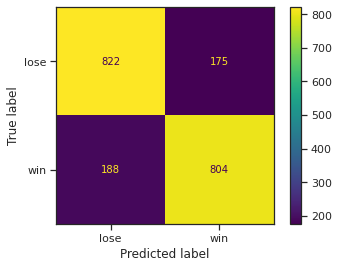

In [6]:
get_model_evaluation(data=df)

### <span style='color:green'> **[done]** </span> Tune model parameters:

In [7]:
knn_opt = pd.DataFrame(columns=['neighbors','accuracy'])

for n in tqdm([1,2,4,8,16,32,64,128,256]):
    knn_opt = pd.concat([knn_opt, get_knn_grad_step( X_columns=X, y_columns=y, data=df, neighbors=n)], ignore_index=True)
        
max_stat_knn = knn_opt[knn_opt.accuracy==np.max(knn_opt.accuracy)].reset_index(drop=True)
print('Best Model:')
max_stat_knn

100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

Best Model:


,neighbors,accuracy
0,512,0.859539


<AxesSubplot:xlabel='neighbors', ylabel='accuracy'>

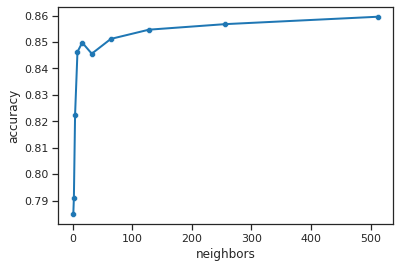

In [16]:
sns.lineplot(data=knn_opt, y='accuracy', x='neighbors')
sns.scatterplot(data=knn_opt, y='accuracy', x='neighbors')

In [8]:
# get best knn parameters to save:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns='Unnamed: 0')
param = param[param.ml_model=='knn_reg']

knn_clf_param = pd.DataFrame(data={'ml_model':['knn_clf'],
                           'parameter_name':[max_stat_knn.columns[0]],
                           'value':[max_stat_knn.loc[0,'neighbors']],
                           'accuracy':[max_stat_knn.loc[0,'accuracy']]}
                    )
param = pd.concat([param,knn_clf_param])
param

,ml_model,parameter_name,value,accuracy
0,knn_reg,neighbors,29,0.629700
0,knn_clf,neighbors,512,0.859539


In [9]:
param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


### <span style='color:green'> **[done]** </span> Train optimized model:

In [10]:
n = get_knn_clf_param(filename='../global_variables/ml_models_parameters.csv')

knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=df, neighbors=n)
df = set_predictions(model=knn_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,test,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,win
6729,test,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,lose
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


Accuracy = 0.861237


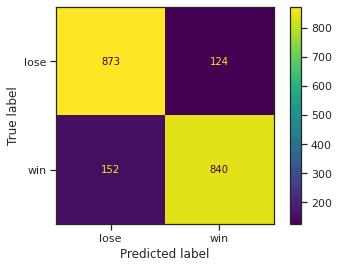

In [11]:
get_model_evaluation(data=df)

In [12]:
df.to_csv('../data/fight_results_data_trained.csv')
print('../data/fight_results_data_trained.csv saved.')

../data/fight_results_data_trained.csv saved.
